In [1]:
import pandas as pd
import plotly.express as px

In [2]:
# Load cleaned data
df = pd.read_csv(r'F:\Projects\2_COVID-19 Global Analysis\2_Cleaned Data\owid-covid-cleaned.csv')

In [3]:
print(df.head())

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1      AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2      AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3      AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4      AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   

   total_deaths  new_deaths  total_vaccinations  new_vaccinations  
0           0.0         0.0                 0.0               0.0  
1           0.0         0.0                 0.0               0.0  
2           0.0         0.0                 0.0               0.0  
3           0.0         0.0                 0.0               0.0  
4           0.0         0.0                 0.0               0.0  


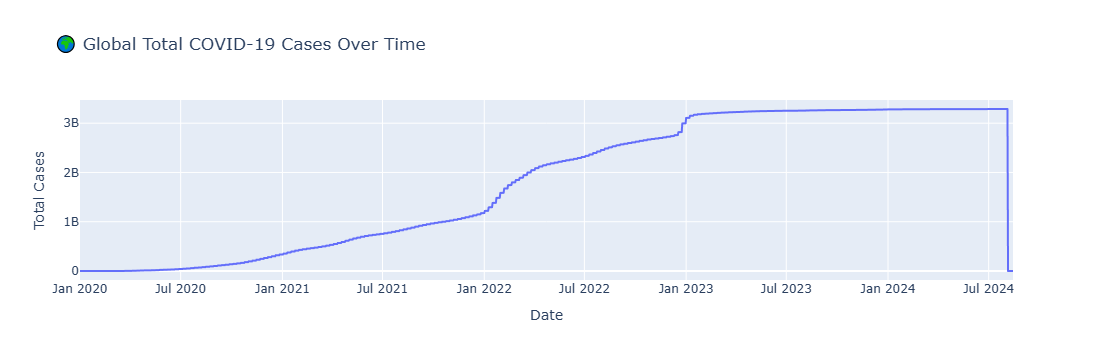

In [4]:
#2️⃣ Global trend of total cases over time
# Sum total cases by date
global_cases = df.groupby('date')['total_cases'].sum().reset_index()

fig = px.line(global_cases,
              x='date',
              y='total_cases',
              title='🌍 Global Total COVID-19 Cases Over Time',
              labels={'total_cases': 'Total Cases', 'date': 'Date'})

fig.show()


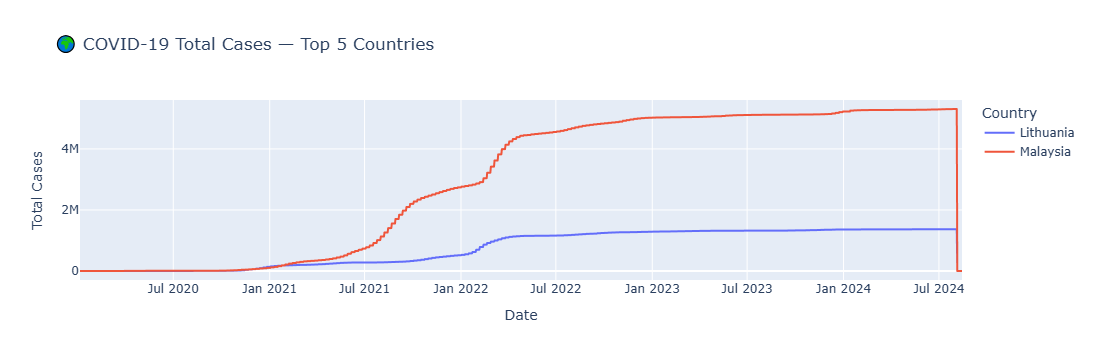

In [6]:
#3️⃣ Compare top 5 countries’ trends
# Get latest date & top 5 countries
latest_date = df['date'].max()
latest = df[df['date'] == latest_date]
latest_countries = latest[~latest['iso_code'].str.startswith('OWID')]
top5 = latest_countries.nlargest(5, 'total_cases')['location'].tolist()

# Filter for top 5 countries
df_top5 = df[df['location'].isin(top5)]

fig = px.line(df_top5,
              x='date',
              y='total_cases',
              color='location',
              title='🌍 COVID-19 Total Cases — Top 5 Countries',
              labels={'total_cases': 'Total Cases', 'date': 'Date', 'location': 'Country'})

fig.show()


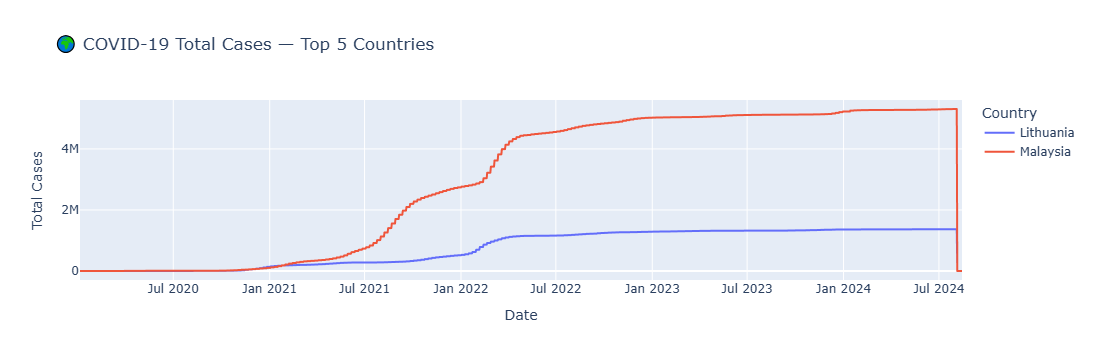

In [7]:
df_top5 = df[df['location'].isin(top5)]

fig = px.line(df_top5,
              x='date',
              y='total_cases',
              color='location',
              title='🌍 COVID-19 Total Cases — Top 5 Countries',
              labels={'total_cases': 'Total Cases', 'date': 'Date', 'location': 'Country'})

fig.show()


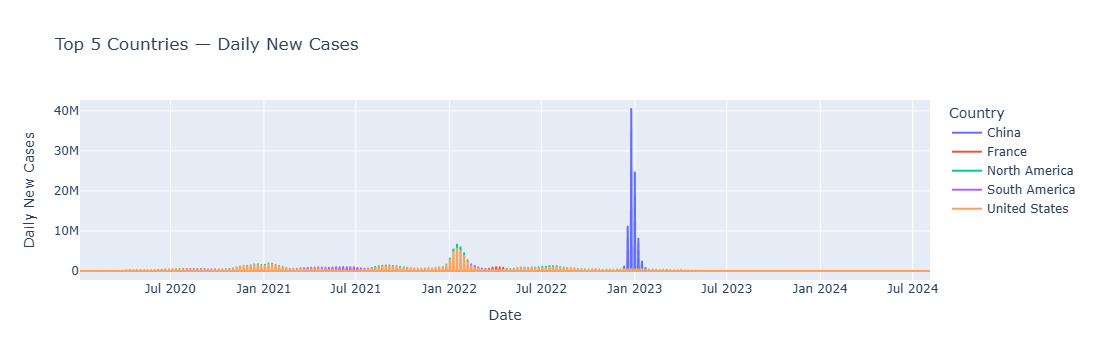

In [9]:
# Find latest total cases per country
latest = df.sort_values('date').drop_duplicates('location', keep='last')
top5 = latest.nlargest(5, 'total_cases')['location']

# Filter data
df_top5 = df[df['location'].isin(top5)]

fig = px.line(df_top5,
              x='date',
              y='new_cases',
              color='location',
              title='Top 5 Countries — Daily New Cases',
              labels={'new_cases': 'Daily New Cases', 'date': 'Date', 'location': 'Country'})

fig.show()

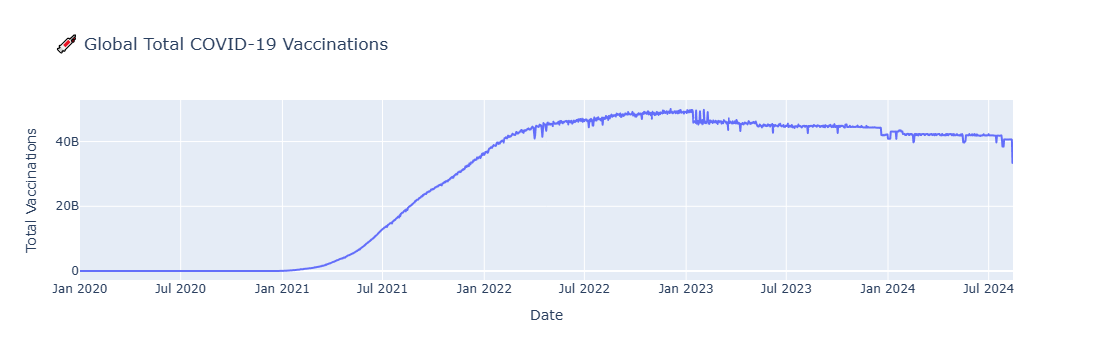

In [10]:
#4️⃣ Vaccination trend over time
# If total_vaccinations exists:
if 'total_vaccinations' in df.columns:
    global_vax = df.groupby('date')['total_vaccinations'].sum().reset_index()

    fig = px.line(global_vax,
                  x='date',
                  y='total_vaccinations',
                  title='💉 Global Total COVID-19 Vaccinations',
                  labels={'total_vaccinations': 'Total Vaccinations', 'date': 'Date'})

    fig.show()
else:
    print("⚠️ Vaccination data not found in this dataset.")


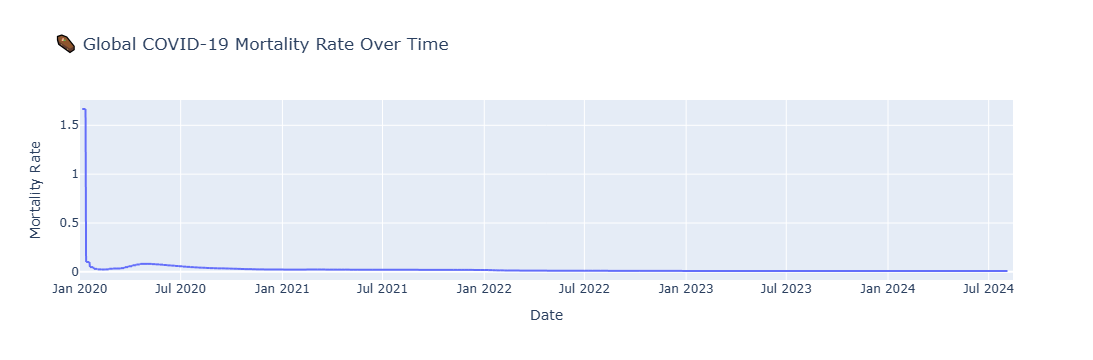

In [11]:
#5️⃣ Mortality rate trend over time
# Mortality rate: deaths / cases
daily_global = df.groupby('date')[['total_deaths', 'total_cases']].sum().reset_index()
daily_global['mortality_rate'] = daily_global['total_deaths'] / daily_global['total_cases']

fig = px.line(daily_global,
              x='date',
              y='mortality_rate',
              title='⚰️ Global COVID-19 Mortality Rate Over Time',
              labels={'mortality_rate': 'Mortality Rate', 'date': 'Date'})

fig.show()
